In [33]:
import os
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
TRAINING_NORMAL_DIR = r"C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\train\NORMAL"
TESTING_NORMAL_DIR = r"C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\test\NORMAL"


TRAINING_PNEUMONIA_DIR = r"C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\train\PNEUMONIA"
TESTING_PNEUMONIA_DIR = r"C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\test\PNEUMONIA"

In [35]:
print(len(os.listdir(TRAINING_NORMAL_DIR)))
print(len(os.listdir(TESTING_NORMAL_DIR)))

print(len(os.listdir(TRAINING_PNEUMONIA_DIR)))
print(len(os.listdir(TESTING_PNEUMONIA_DIR)))

1349
234
3883
390


In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
TRAINING_DIR = r"C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\train"
train_datagen = ImageDataGenerator(rescale=1./510,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = r"C:\Users\meiza\Documents\GitHub\CNN-Pneumonia\chest_xray\test"
validation_datagen = ImageDataGenerator(rescale=1./510,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [38]:
history = model.fit(train_generator,
                              epochs=15,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/15
53/53 [==============================] - 112s 2s/step - loss: 0.6876 - accuracy: 0.7141 - val_loss: 0.7145 - val_accuracy: 0.6250
Epoch 2/15
53/53 [==============================] - 104s 2s/step - loss: 0.5300 - accuracy: 0.7445 - val_loss: 0.5166 - val_accuracy: 0.7372
Epoch 3/15
53/53 [==============================] - 104s 2s/step - loss: 0.4679 - accuracy: 0.7854 - val_loss: 0.9309 - val_accuracy: 0.6362
Epoch 4/15
53/53 [==============================] - 105s 2s/step - loss: 0.3985 - accuracy: 0.8207 - val_loss: 0.9357 - val_accuracy: 0.6378
Epoch 5/15
53/53 [==============================] - 104s 2s/step - loss: 0.3863 - accuracy: 0.8140 - val_loss: 0.4804 - val_accuracy: 0.7933
Epoch 6/15
53/53 [==============================] - 105s 2s/step - loss: 0.3516 - accuracy: 0.8494 - val_loss: 0.5226 - val_accuracy: 0.7708
Epoch 7/15
53/53 [==============================] - 105s 2s/step - loss: 0.3295 - accuracy: 0.8536 - val_loss: 0.5523 - val_accuracy: 0.7580
Epoch 8/15
53

<Figure size 432x288 with 0 Axes>

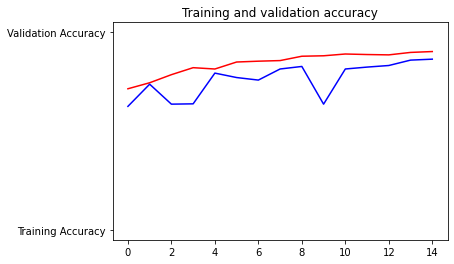

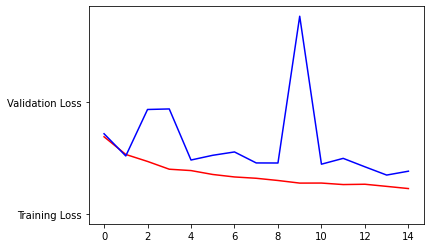

<Figure size 432x288 with 0 Axes>

In [39]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")